# Simple Simulation Analysis

In this notebook I will analyse the output of a simple simulation. First, I load the output data of the two stations.

In [29]:
%matplotlib inline

import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import 

#customer_data = pd.read_csv('../output/customer_output.csv', index_col=0)
#depot_data = pd.read_csv('../output/depot_output.csv', index_col=0)

depot_data.head()

,service_stock,repair_stock
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


## Visualisation of stock over time

The stock levels of the repairable and servicable units are recorded over time. Let's check these.

In [30]:
# Combine datasets
customer_data.columns = 'customer_' + customer_data.columns
depot_data.columns = "depot_" + depot_data.columns
all_data = pd.concat([customer_data, depot_data], axis=1)

# Add time index
all_data['time'] = np.linspace(start=0, stop=all_data.shape[0]*0.01, num=all_data.shape[0])

all_data.head()

,customer_service_stock,customer_repair_stock,depot_service_stock,depot_repair_stock,time
0,4.99,0.01,0.0,0.0,0.000000
1,5.98,0.02,0.0,0.0,0.010005
2,5.97,0.03,0.0,0.0,0.020010
3,5.96,0.04,0.0,0.0,0.030015
4,5.95,0.05,0.0,0.0,0.040020


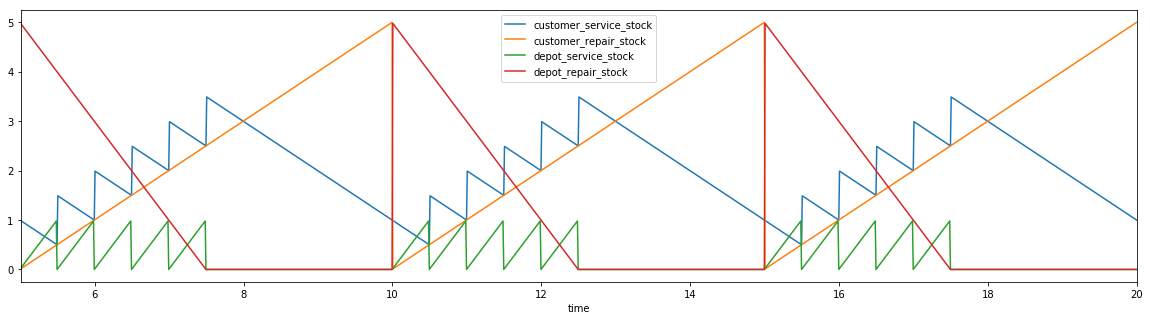

In [31]:
# Plot lines over time 
all_data[all_data.time > 5].plot(x='time', y=all_data.columns[0:4], figsize=[20, 5])

## Compute the average cycle cost

In this simple model, we assume that sending a batch from the server to the depot has a cost `c_d` and sending a batch of repairable units from the depot to the server costs `c_r`. In general we have that `c_r` > `c_d`, since the reverse flow is typically less efficient. Besides, set-up costs for orders, a holding costs of `h_d` per unit per unit of time for stock of servicable units at the depot has to be paid. In case of a shortage, a backlogging cost of `b_d` per unit per unit of time is incurred. For now, I do not assume any holding cost for the repairable units.

In [36]:
# Cost structure
c_d = 1
c_r = 3
h_d = 0.02
b_d = 0.4

# In this case, the cycle length can be easily eye-balled.

# Take data for one cycle
cycle_data = all_data.query('5 <= time <= 10')

# Get all order events
customer_events = pd.read_csv('../output/customer_events.csv', index_col=0).query('5 <= time <= 10')
depot_events = pd.read_csv('../output/depot_events.csv', index_col=0).query('5 <= time <= 10')

# Count orders
n_order_customer = customer_events.shape[0]
n_order_depot = depot_events.shape[0]

# Inventory in numpy
customer_stock = cycle_data.customer_service_stock.to_numpy()

# Compute costs
total_order_costs = n_order_customer * c_r + n_order_depot * c_d
total_var_costs = customer_stock.clip(min=0).sum() * h_d + np.sum(-customer_stock.clip(max=0)) * b_d

print(total_order_costs + total_var_costs)

19.950000000001072


### Average inventory levels per cycle

In [ ]:
cycle_data.